<a href="https://colab.research.google.com/github/sgevatschnaider/machine-learning/blob/main/notebooks/es/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, HTML

# Enlace actualizado
svm_link = "https://drive.google.com/file/d/1Rv4764KtigE4CIrMbOgMTX2v34_TLnBh/view?usp=drive_link"

# Código HTML actualizado
html_index = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Support Vector Machines</title>
    <style>
        body {{
            font-family: 'Georgia', serif;
            line-height: 1.8;
            margin: 20px;
            padding: 20px;
            background-color: #f9f9f9;
            background-image: url('https://www.transparenttextures.com/patterns/light-paper-fibers.png');
            background-size: cover;
            background-attachment: fixed;
            background-blend-mode: lighten;
        }}
        .navbar {{
            background-color: #0066cc;
            color: white;
            padding: 10px 15px;
            text-align: center;
            font-size: 1.2em;
            width: 100%;
        }}
        h1 {{
            color: #333;
            text-align: center;
            font-size: 2.5em;
            margin-bottom: 5px;
            font-family: 'Arial', sans-serif;
        }}
        .subtitle {{
            text-align: center;
            font-size: 1.2em;
            margin-bottom: 20px;
            color: #555;
        }}
        h2 {{
            color: #0056b3;
            font-size: 1.4em;
            cursor: pointer;
            background-color: #e0f7fa;
            padding: 8px;
            border-radius: 5px;
            margin-top: 15px;
        }}
        p, ul, li {{
            font-size: 1.1em;
            margin-bottom: 15px;
        }}
        ul {{
            font-size: 1.1em;
            list-style-type: none;
            padding-left: 20px;
            display: none;
        }}
        li {{
            margin-bottom: 10px;
        }}
        .view-link {{
            background-color: #ff5722;
            color: white;
            padding: 12px 20px;
            font-size: 1.1em;
            display: inline-block;
            border-radius: 8px;
            text-decoration: none;
            transition: background-color 0.3s ease;
            box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);
        }}
        .view-link:hover {{
            background-color: #e64a19;
            box-shadow: 0px 6px 10px rgba(0, 0, 0, 0.15);
        }}
        .card {{
            background-color: #ffffff;
            border-radius: 8px;
            box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);
            padding: 20px;
            margin-bottom: 20px;
        }}
    </style>
</head>
<body>
    <div class="navbar">
        Support Vector Machines
    </div>

    <h1>Support Vector Machines</h1>
    <p class="subtitle">Material elaborado por Sergio Gevatschnaider</p>

    <!-- Botón con el enlace -->
    <p>
        <a href="{svm_link}" target="_blank" class="view-link">Support Vector Machines</a>
    </p>

    <!-- Contenido interactivo -->
    <div class="card">
        <h2 onclick="toggleContent('content1')">1. Introducción a Support Vector Machines</h2>
        <h2 onclick="toggleContent('content2')">2. Hiperplano Óptimo y Vectores de Soporte</h2>
        <h2 onclick="toggleContent('content3')">3. Datos Linealmente y No Linealmente Separables</h2>
        <h2 onclick="toggleContent('content4')">4. Parámetro C y Margen</h2>
        <h2 onclick="toggleContent('content5')">5. Proyecciones a Espacios de Mayor Dimensionalidad</h2>
        <h2 onclick="toggleContent('content6')">6. Kernels</h2>
        <h2 onclick="toggleContent('content7')">7. Implementación y Ejemplos con Scikit-Learn</h2>
        <h2 onclick="toggleContent('content8')">8. Ventajas y Desventajas de SVM</h2>
        <h2 onclick="toggleContent('content9')">9. Enlaces Recomendados</h2>
        <h2 onclick="toggleContent('content10')">10. Sección de Práctica (Lab Time)</h2>
    </div>

    <script>
        function toggleContent(id) {{
            var content = document.getElementById(id);
            if (content.style.display === "none" || content.style.display === "") {{
                content.style.display = "block";
            }} else {{
                content.style.display = "none";
            }}
        }}
        document.querySelectorAll('ul').forEach(ul => ul.style.display = 'none');
    </script>

</body>
</html>
"""

# Renderizar el HTML en Google Colab
display(HTML(html_index))


In [ ]:
from IPython.display import display, HTML

# Código HTML para explicar Support Vector Machines (SVM)
html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Support Vector Machines (SVM)</title>
    <style>
        body {
            font-family: 'Georgia', serif;
            line-height: 1.8;
            margin: 20px;
            padding: 20px;
            background-color: #f9f9f9;
        }
        h1, h2, h3 {
            color: #333;
            font-family: 'Arial', sans-serif;
        }
        h1 {
            font-size: 2.5em;
            margin-bottom: 10px;
        }
        h2 {
            font-size: 2em;
            margin-bottom: 10px;
        }
        h3 {
            font-size: 1.5em;
            margin-bottom: 5px;
        }
        p {
            font-size: 1.2em;
            color: #555;
            margin-bottom: 15px;
        }
        ul {
            font-size: 1.2em;
            color: #555;
            margin-bottom: 15px;
            padding-left: 20px;
        }
        li {
            margin-bottom: 10px;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            border: 1px solid #ddd;
            text-align: left;
            padding: 8px;
        }
        th {
            background-color: #f2f2f2;
        }
        hr {
            border: 1px solid #ddd;
            margin: 20px 0;
        }
    </style>
</head>
<body>
    <h1>Support Vector Machines (SVM)</h1>

    <h2>1. Concepto Básico de SVM</h2>
    <p>
        Los Support Vector Machines (SVM) son un conjunto de algoritmos de aprendizaje supervisado utilizados tanto para clasificación como para regresión.
        El objetivo principal de un SVM es encontrar el <strong>hiperplano óptimo</strong> que mejor separa las clases en un espacio multidimensional.
    </p>
    <ul>
        <li><strong>Clasificación:</strong> Divide puntos de datos en diferentes clases (etiquetas).</li>
        <li><strong>Regresión:</strong> Encuentra un hiperplano que esté lo más cerca posible de los puntos.</li>
    </ul>

    <h2>2. Cómo Funciona SVM</h2>
    <h3>a) Separación de Datos</h3>
    <p>
        Imagina dos clases (roja y azul) en un plano bidimensional. SVM busca un hiperplano que divida los puntos de estas dos clases de la mejor manera posible.
    </p>

    <h3>b) Hiperplano Óptimo</h3>
    <ul>
        <li>El hiperplano óptimo maximiza el <strong>margen</strong> entre los puntos más cercanos de cada clase.</li>
        <li>Los puntos cercanos al hiperplano se llaman <strong>vectores de soporte</strong>.</li>
        <li>Un margen más grande significa mejor separación y robustez frente a nuevos datos.</li>
    </ul>

    <h3>c) Casos Lineales y No Lineales</h3>
    <ul>
        <li><strong>Datos Linealmente Separables:</strong> SVM encuentra un hiperplano que maximiza el margen.</li>
        <li><strong>Datos No Linealmente Separables:</strong> SVM utiliza <strong>kernels</strong> para transformar los datos a un espacio de mayor dimensión donde puedan separarse linealmente.</li>
    </ul>
    <hr>

    <h2>3. Componentes Clave de SVM</h2>
    <h3>a) Función de Costo</h3>
    <p>
        SVM optimiza un problema matemático para encontrar el hiperplano que minimice el error y maximice el margen.
    </p>
    <ul>
        <li><strong>w:</strong> Vector de pesos que define el hiperplano.</li>
        <li><strong>b:</strong> Sesgo (intercepto) del hiperplano.</li>
        <li><strong>C:</strong> Parámetro que controla el trade-off entre maximizar el margen y minimizar el error de clasificación.</li>
    </ul>

    <h3>b) Margen y Vectores de Soporte</h3>
    <ul>
        <li>Los vectores de soporte son los puntos de datos que determinan el margen.</li>
        <li>Solo estos puntos afectan la posición del hiperplano.</li>
    </ul>

    <h3>c) Parámetros Importantes</h3>
    <ul>
        <li><strong>C (Término de Regularización):</strong>
            <ul>
                <li>C alto: Penaliza más los errores, creando márgenes pequeños (posible sobreajuste).</li>
                <li>C bajo: Permite más errores, pero crea márgenes más grandes (mejor generalización).</li>
            </ul>
        </li>
        <li><strong>Kernel:</strong>
            <ul>
                <li>Lineal: Separa datos linealmente.</li>
                <li>Polinómico: Usa curvas polinómicas para separar datos.</li>
                <li>RBF: Ideal para datos no lineales complejos.</li>
                <li>Sigmoide: Funciona como una función de activación en redes neuronales.</li>
            </ul>
        </li>
    </ul>
    <hr>

    <h2>4. Ventajas y Desventajas de SVM</h2>
    <table>
        <thead>
            <tr>
                <th>Ventajas</th>
                <th>Desventajas</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Funciona bien en espacios de alta dimensión.</td>
                <td>No es adecuado para grandes conjuntos de datos debido a su complejidad computacional (O(n²)).</td>
            </tr>
            <tr>
                <td>Generalización robusta gracias al margen máximo.</td>
                <td>El rendimiento depende mucho de los hiperparámetros como C y el tipo de kernel.</td>
            </tr>
            <tr>
                <td>Flexible gracias a los kernels para problemas no lineales.</td>
                <td>Difícil de interpretar en problemas no lineales.</td>
            </tr>
        </tbody>
    </table>
    <hr>

    <h2>Conclusión</h2>
    <p>
        SVM es una herramienta poderosa para resolver problemas de clasificación y regresión.
        Su capacidad para manejar datos de alta dimensión y su flexibilidad lo hacen muy efectivo, aunque puede ser computacionalmente costoso.
    </p>
</body>
</html>
"""

# Renderizar el HTML en Google Colab
display(HTML(html_content))


Ventajas,Desventajas
Funciona bien en espacios de alta dimensión.,No es adecuado para grandes conjuntos de datos debido a su complejidad computacional (O(n²)).
Generalización robusta gracias al margen máximo.,El rendimiento depende mucho de los hiperparámetros como C y el tipo de kernel.
Flexible gracias a los kernels para problemas no lineales.,Difícil de interpretar en problemas no lineales.


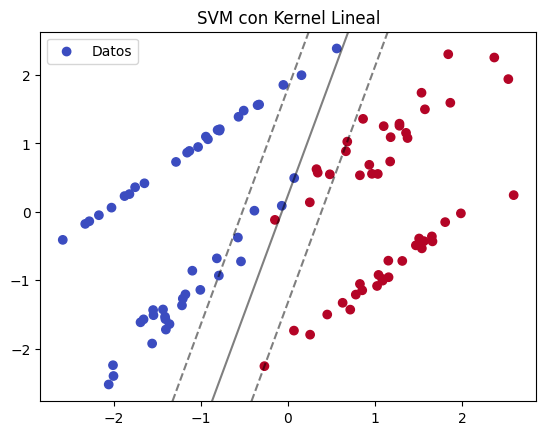

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generar datos
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42
)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo SVM con kernel lineal
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Visualizar el hiperplano
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', label="Datos")
ax = plt.gca()

# Dibujar el hiperplano
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.title("SVM con Kernel Lineal")
plt.legend()
plt.show()


Ejemplo con Kernel RBF
Para datos no lineales, cambiamos a un kernel RBF

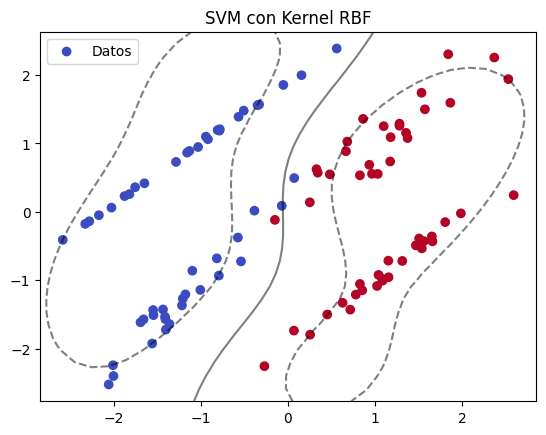

In [ ]:
# Crear un modelo SVM con kernel RBF
model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
model_rbf.fit(X_train, y_train)

# Visualizar la frontera de decisión
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', label="Datos")
ax = plt.gca()

# Dibujar la frontera de decisión
Z = model_rbf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.title("SVM con Kernel RBF")
plt.legend()
plt.show()


In [ ]:
from IPython.display import display, HTML

# Código HTML para explicar la relación entre SVM, sesgo y varianza
html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>SVM: Relación con Sesgo y Varianza</title>
    <style>
        body {
            font-family: 'Georgia', serif;
            line-height: 1.8;
            margin: 20px;
            padding: 20px;
            background-color: #f9f9f9;
        }
        h1, h2, h3 {
            color: #333;
            font-family: 'Arial', sans-serif;
        }
        h1 {
            font-size: 2.5em;
            margin-bottom: 10px;
        }
        h2 {
            font-size: 2em;
            margin-bottom: 10px;
        }
        h3 {
            font-size: 1.5em;
            margin-bottom: 5px;
        }
        p {
            font-size: 1.2em;
            color: #555;
            margin-bottom: 15px;
        }
        ul {
            font-size: 1.2em;
            color: #555;
            margin-bottom: 15px;
            padding-left: 20px;
        }
        li {
            margin-bottom: 10px;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            border: 1px solid #ddd;
            text-align: left;
            padding: 8px;
        }
        th {
            background-color: #f2f2f2;
        }
        hr {
            border: 1px solid #ddd;
            margin: 20px 0;
        }
    </style>
</head>
<body>
    <h1>Relación entre SVM, Sesgo y Varianza</h1>

    <h2>1. Sesgo</h2>
    <p>
        El sesgo en SVM depende del margen que el modelo permita:
    </p>
    <ul>
        <li><strong>Margen ancho (C bajo):</strong>
            <ul>
                <li>SVM con un margen ancho prioriza la simplicidad del modelo.</li>
                <li>Esto puede llevar a un <strong>alto sesgo</strong>, ya que no ajusta perfectamente los datos.</li>
            </ul>
        </li>
    </ul>

    <h2>2. Varianza</h2>
    <p>
        La varianza en SVM está relacionada con la flexibilidad del modelo:
    </p>
    <ul>
        <li><strong>Margen estrecho (C alto):</strong>
            <ul>
                <li>SVM con un margen estrecho intenta ajustar los datos lo mejor posible.</li>
                <li>Esto puede llevar a una <strong>alta varianza</strong>, especialmente si los datos contienen ruido.</li>
            </ul>
        </li>
    </ul>

    <h2>3. Kernels</h2>
    <p>
        Los kernels permiten que SVM maneje datos no lineales, pero impactan en el sesgo y la varianza:
    </p>
    <ul>
        <li><strong>Kernels no lineales:</strong>
            <ul>
                <li>Pueden reducir el <strong>sesgo</strong> al permitir la separación de datos complejos.</li>
                <li>Aumentan la <strong>varianza</strong>, ya que el modelo se vuelve más flexible.</li>
            </ul>
        </li>
    </ul>
    <hr>

    <h2>Conclusión</h2>
    <p>
        SVM permite controlar el trade-off entre sesgo y varianza a través de hiperparámetros como <strong>C</strong> y los <strong>kernels</strong>.
        Al ajustar estos parámetros, puedes encontrar el equilibrio adecuado para tu problema específico.
    </p>
</body>
</html>
"""

# Renderizar el HTML en Google Colab
display(HTML(html_content))
